In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
train_df=pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [62]:
test_df=pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [63]:
final_df=train_df.append(test_df)
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


# Feature Engineering

In [64]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [65]:
## converting Date of journey into date format by creating 3 columns of data(d/m/y)
final_df['date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [66]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [67]:
final_df['date']=final_df['date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [68]:
 final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [69]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [70]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [71]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
date                  0
Month                 0
Year                  0
dtype: int64

In [72]:
final_df['Arrival_hour']=final_df['Arrival_Time'].apply(lambda x:x.split(':')[0])
final_df['Arrival_minutes']=final_df['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [73]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_minutes']=final_df['Arrival_minutes'].astype(int)


In [74]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [75]:
final_df['Dep_hour']=final_df['Dep_Time'].apply(lambda x:x.split(':')[0])
final_df['Dep_minutes']=final_df['Dep_Time'].apply(lambda x:x.split(':')[1])

In [76]:
final_df['Dep_hour']=final_df['Dep_hour'].astype(int)
final_df['Dep_minutes']=final_df['Dep_minutes'].astype(int)


In [77]:
final_df.drop('Dep_Time',axis=1,inplace=True)

In [78]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [79]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [80]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4})

In [81]:
final_df.drop('Route',axis=1,inplace=True)

In [82]:
final_df[final_df['Total_Stops'].isna()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [83]:
final_df['Additional_Info'].unique()


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [84]:

final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_hour     13354 non-null  int32  
 11  Arrival_minutes  13354 non-null  int32  
 12  Dep_hour         13354 non-null  int32  
 13  Dep_minutes      13354 non-null  int32  
dtypes: float64(2), int32(7), object(5)
memory usage: 1.2+ MB


In [85]:

final_df['duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]


In [86]:

final_df[final_df['duration_hour']=='5m']


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,1.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,1.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [87]:

final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)
final_df.drop(9039,axis=0,inplace=True)

In [88]:

final_df['duration_hour']=final_df['duration_hour'].astype('int')


In [89]:

final_df.drop('Duration',axis=1,inplace=True)


In [90]:

final_df.head(1)


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,duration_hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2


In [91]:

final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [92]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [93]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [94]:
final_df.shape

(13350, 14)

In [95]:
final_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,duration_hour
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,1.0,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,1.0,8,13882.0,9,6,2019,4,25,9,25,19
3,3,3,0,2.0,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,2.0,8,13302.0,1,3,2019,21,35,16,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,2.0,8,NaN,6,6,2019,20,25,20,30,23
2667,3,3,0,0.0,8,NaN,27,3,2019,16,55,14,20,2
2668,4,2,1,2.0,8,NaN,6,3,2019,4,25,21,50,6
2669,1,2,1,2.0,8,NaN,6,3,2019,19,15,4,0,15


In [126]:
final_df=pd.get_dummies(final_df,columns=["Airline", "Source", "Destination"] ,drop_first = True)

In [127]:
#Y=final_df.loc[final_df['Price'].isna()]

In [128]:
#Y.drop('Price',axis=1,inplace=True)
#Y.shape

In [129]:
#Y

In [130]:
X=final_df.loc[~final_df['Price'].isna()]
X.shape

(10680, 31)

In [131]:
X.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'date', 'Month', 'Year',
       'Arrival_hour', 'Arrival_minutes', 'Dep_hour', 'Dep_minutes',
       'duration_hour', 'Airline_1', 'Airline_2', 'Airline_3', 'Airline_4',
       'Airline_5', 'Airline_6', 'Airline_7', 'Airline_8', 'Airline_9',
       'Airline_10', 'Airline_11', 'Source_1', 'Source_2', 'Source_3',
       'Source_4', 'Destination_1', 'Destination_2', 'Destination_3',
       'Destination_4', 'Destination_5'],
      dtype='object')

In [132]:
x=X[['Total_Stops', 'Additional_Info','date', 'Month', 'Year',
       'Arrival_hour', 'Arrival_minutes', 'Dep_hour', 'Dep_minutes',
       'duration_hour', 'Airline_1', 'Airline_2', 'Airline_3', 'Airline_4',
       'Airline_5', 'Airline_6', 'Airline_7', 'Airline_8', 'Airline_9',
       'Airline_10', 'Airline_11', 'Source_1', 'Source_2', 'Source_3',
       'Source_4', 'Destination_1', 'Destination_2', 'Destination_3',
       'Destination_4', 'Destination_5']]

In [133]:
Y=X['Price']

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     x, Y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)

(7155, 30)
(7155,)


# Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualization 

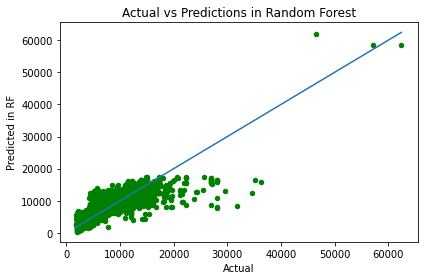

In [136]:
# Plot a scatter between predicted and actual
plt.scatter(y_test, y_pred, s=20, c='green')
plt.title('Actual vs Predictions in Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted in RF')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

# Model Evaluation

In [137]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
print(f'R2 Score:{r2_score(y_test,y_pred)}')

print(f'MAE:{mean_absolute_error(y_test, y_pred)}')

mse=mean_squared_error(y_test, y_pred)
print(f'MSE:{mse}')
print(f'RMSE:{math.sqrt(mse)}')

R2 Score:0.6483337337825213
MAE:1882.1436420378072
MSE:7351977.628466771
RMSE:2711.453047439098


# XGBoost Regressor

In [138]:
from xgboost import  XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(X_train, y_train)
ypred = xgbr.predict(X_test)

# Model Evaluation

In [139]:
 print(f'R2 Score:{r2_score(y_test,ypred)}')

print(f'MAE:{mean_absolute_error(y_test, ypred)}')

mse=mean_squared_error(y_test, ypred)
print(f'MSE:{mse}')
print(f'RMSE:{math.sqrt(mse)}')

R2 Score:0.9167055117238084
MAE:783.7177722600842
MSE:1741364.6778461207
RMSE:1319.6077742443474


# Decision Tree

In [140]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

# Model Evaluation

In [141]:
print(f'R2 Score:{r2_score(y_test,pred)}')

print(f'MAE:{mean_absolute_error(y_test, pred)}')

mse=mean_squared_error(y_test, pred)
print(f'MSE:{mse}')
print(f'RMSE:{math.sqrt(mse)}')

R2 Score:0.8017149070804643
MAE:766.2587234042553
MSE:4145372.2100866823
RMSE:2036.0187155541282


# Random Forest

In [142]:
# Ready to Train the model

from sklearn.ensemble import RandomForestRegressor
#random_forrest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with X_train and y_test data
#random_forrest_regressor.fit(X_train, y_train)
Rand_FR = RandomForestRegressor(n_estimators=500, n_jobs=-1)

Rand_FR.fit(X_train, y_train)
y_pred_rf = Rand_FR.predict(X_test)

# Visualization

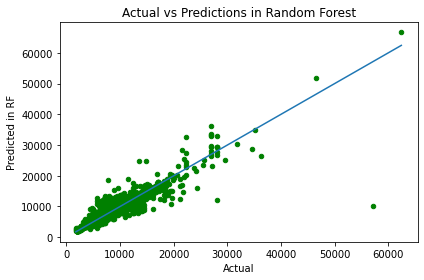

In [143]:
# Plot a scatter between predicted and actual
plt.scatter(y_test, y_pred_rf, s=20, c='green')
plt.title('Actual vs Predictions in Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted in RF')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

# Evaluation

In [144]:
print(f'R2 Score:{r2_score(y_test,y_pred_rf)}')

print(f'MAE:{mean_absolute_error(y_test,y_pred_rf)}')

mse=mean_squared_error(y_test,y_pred_rf)
print(f'MSE:{mse}')
print(f'RMSE:{math.sqrt(mse)}')

R2 Score:0.8905018363006049
MAE:669.911864794449
MSE:2289181.8954801233
RMSE:1513.0042615538541
